## Description
The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Dataset url : https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Import libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# Importing dataset
data=pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Descriptive Statistics

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Visulization

In [ ]:
diabetes_data_copy = data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


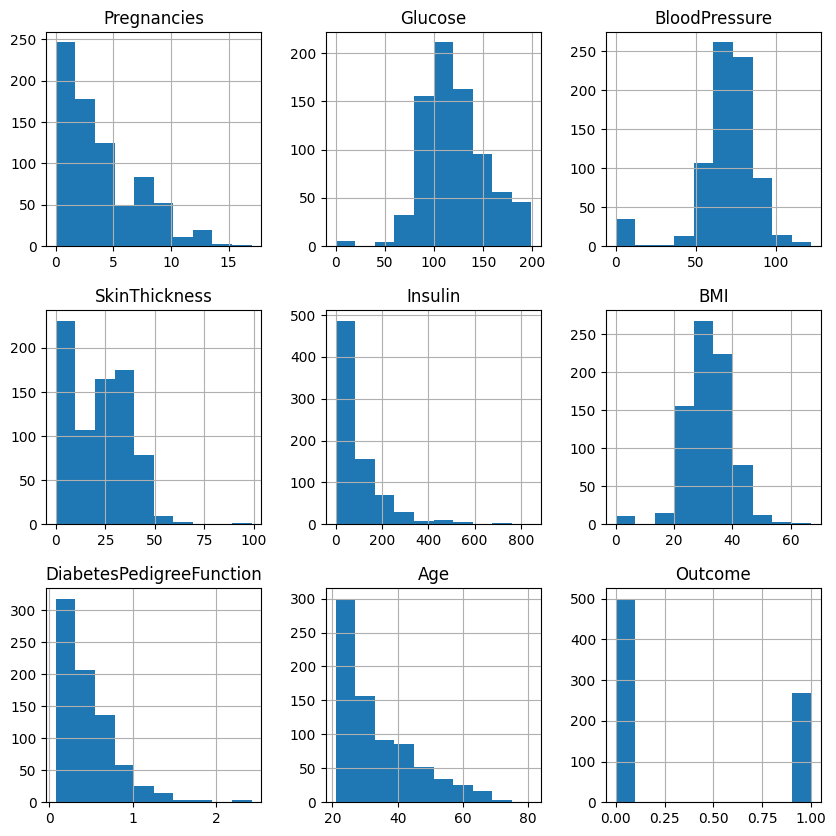

In [ ]:
p = data.hist(figsize = (10,10))

In [ ]:
#Aiming to impute nan values for the columns in accordance with their distribution
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

## Plotting after Nan removal

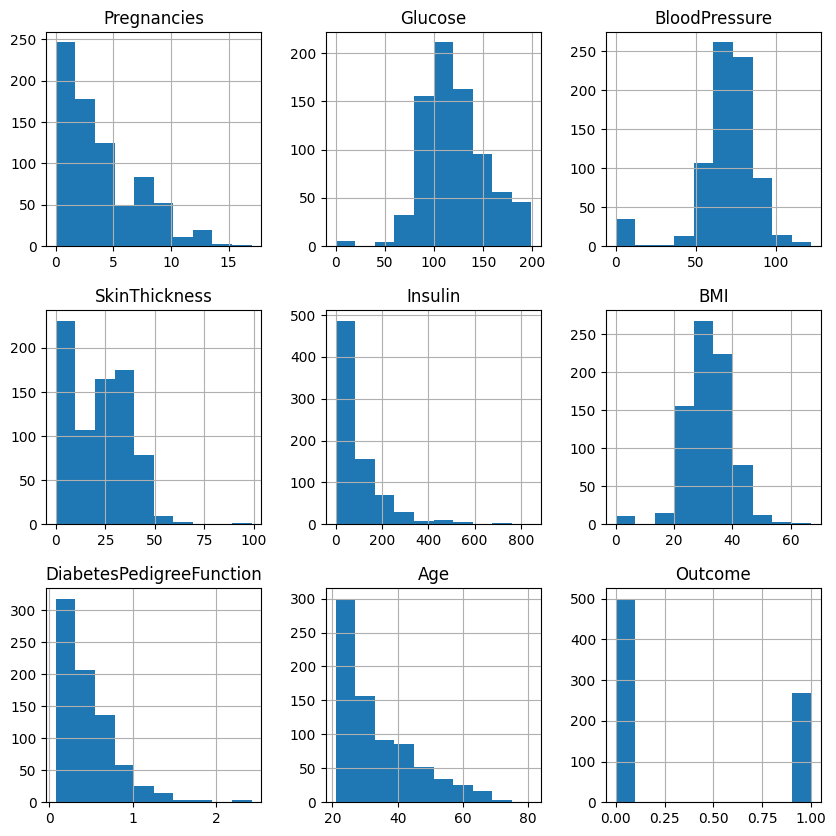

In [ ]:
p = data.hist(figsize = (10,10))

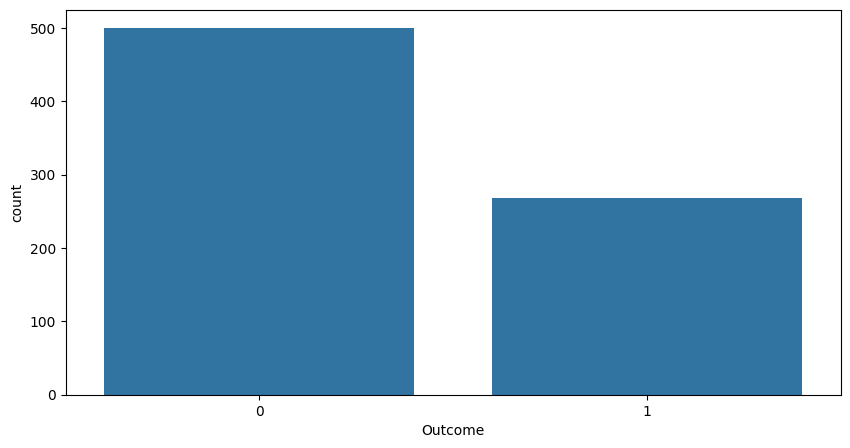

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outcome',data=data)
plt.show()

<Axes: >

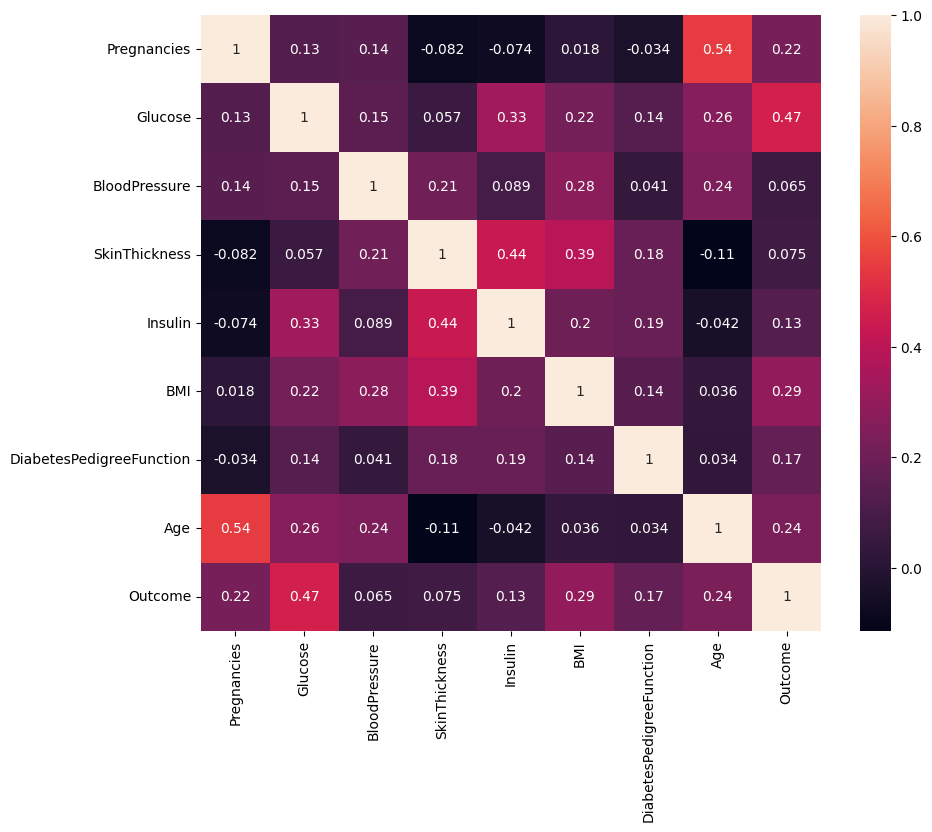

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

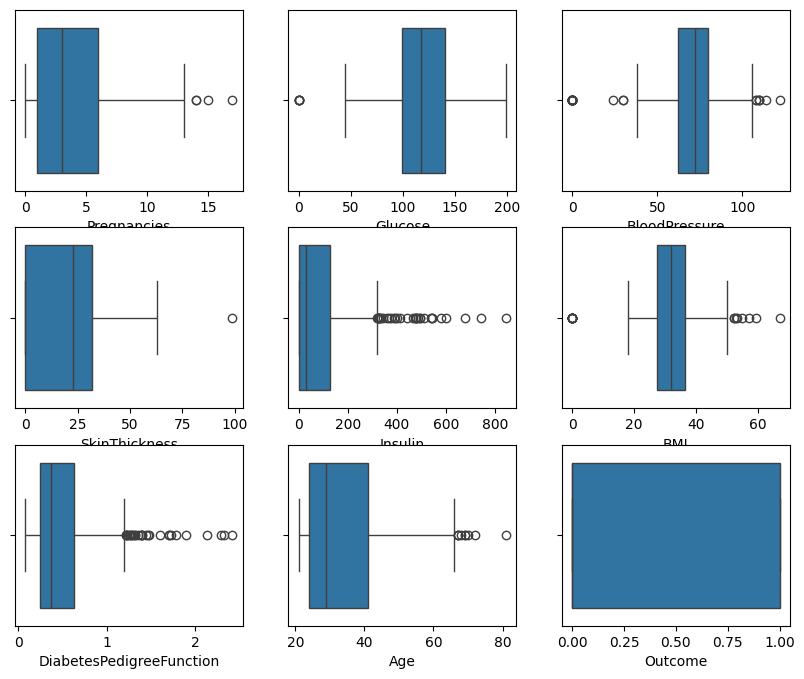

In [ ]:
plt.figure(figsize=(10,8))
for i,col in enumerate(data.columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=col, data=data)
plt.show()

# Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Test-Train split data

In [ ]:
y=data['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [ ]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

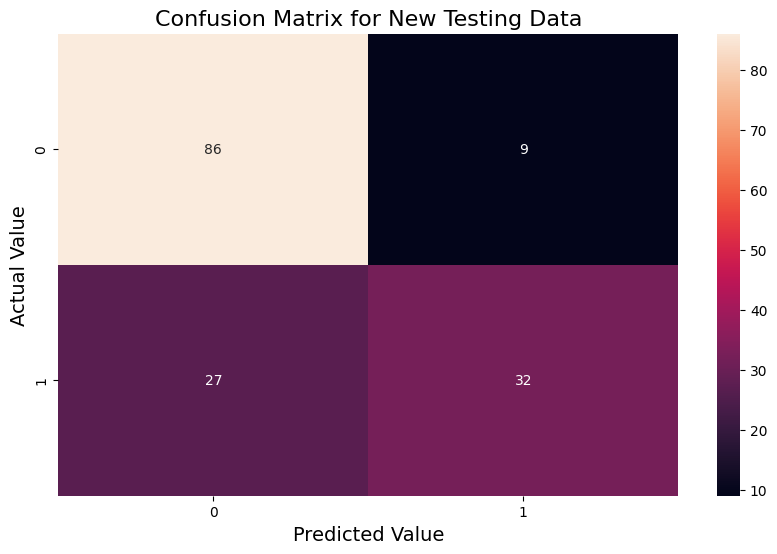

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)
plt.show()

In [ ]:
accurcay_lg=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        95
           1       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



ROC curve and AUC curve

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:, 1]

<ipython-input-23-4c19587dfa82>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', color='red')


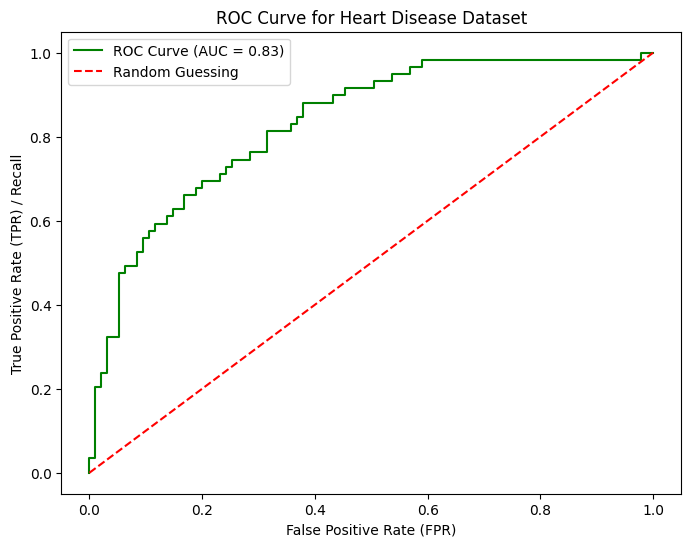

In [ ]:
# Calculate ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', color='red')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('ROC Curve for Heart Disease Dataset')
plt.legend()

# Additional algorithm to check the accuracy

## DecicionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred2 = DT.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred2)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        95
           1       0.70      0.64      0.67        59

    accuracy                           0.76       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



## SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=100,gamma=0.0001)
svm_model.fit(X_train, y_train)
y_pred3 = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred3)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84        95
           1       0.83      0.51      0.63        59

    accuracy                           0.77       154
   macro avg       0.79      0.72      0.73       154
weighted avg       0.78      0.77      0.76       154



## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred4 = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred4)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        95
           1       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred5 = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred5)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        95
           1       0.67      0.49      0.57        59

    accuracy                           0.71       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.71      0.71      0.70       154



## Xgboost

In [ ]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgboost_model = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred6= xgboost_model.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred6)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        95
           1       0.66      0.59      0.62        59

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.72      0.73      0.72       154



## plotting all model accuracy to check the best suitable model

<ipython-input-33-1831cc220d66>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()),palette='viridis')


Text(0.5, 1.0, 'Model Accuracy Comparison')

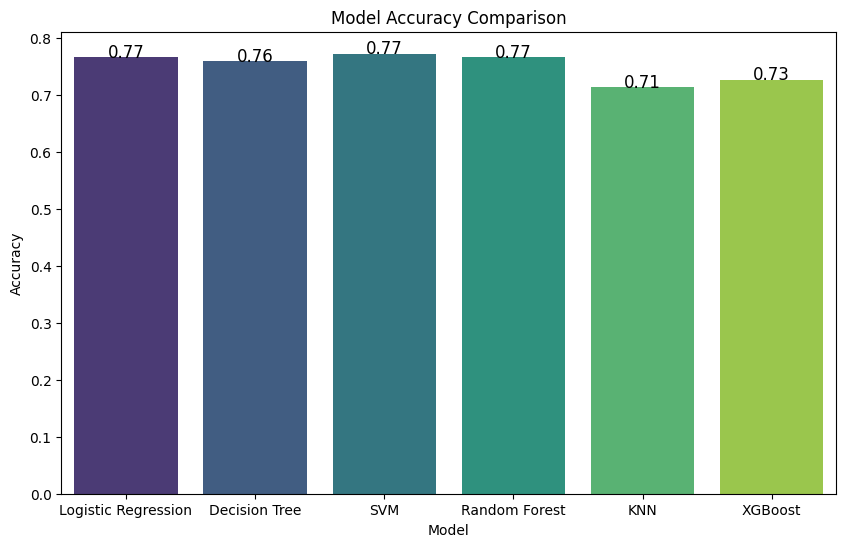

In [ ]:
accuracy_scores = {
    'Logistic Regression': accurcay_lg,
    'Decision Tree': accuracy_dt,
    'SVM': accuracy_svm,
    'Random Forest': accuracy_rf,
    'KNN': accuracy_knn,
    'XGBoost': accuracy_xg
}
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()),palette='viridis')
for i, v in enumerate(list(accuracy_scores.values())):
    ax.text(i, v, str(round(v, 2)), ha='center', fontsize=12)


plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.title('Model Accuracy Comparison')


From the above comparison, we can observe that Logistic regression, SVM, Random forest get the highest accuracy of 77%